<a href="https://colab.research.google.com/github/Vysakhks1807/New-folder--2-/blob/main/prodigy_infotech_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('twitter_training.csv')

# Print column names
print("Column names in the dataset:")
print(train_data.columns)

# Print the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(train_data.head())

Column names in the dataset:
Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

First few rows of the dataset:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [3]:
# Rename columns to match expected names
train_data = train_data.rename(columns={
    '2401': 'Tweet ID',  # Replace '2401' with the actual column name for Tweet ID
    'Borderlands': 'entity',  # Replace 'Borderlands' with the actual column name for entity
    'Positive': 'sentiment',  # Replace 'Positive' with the actual column name for sentiment
    'im getting on borderlands and i will murder you all ,': 'Tweet content'  # Replace with the actual column name for tweet content
})

# Verify the column names after renaming
print("\nColumn names after renaming:")
print(train_data.columns)


Column names after renaming:
Index(['Tweet ID', 'entity', 'sentiment', 'Tweet content'], dtype='object')


First few rows of the training data:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     

Column names in the dataset:
Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

Missing values in the dataset:
Tweet ID           0
entity             0
sentiment          0
Tweet content    686
dtype: int64

Sentiment distribution in the training data:
sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrele

<ipython-input-4-589181b59be1>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=train_data, palette='viridis')


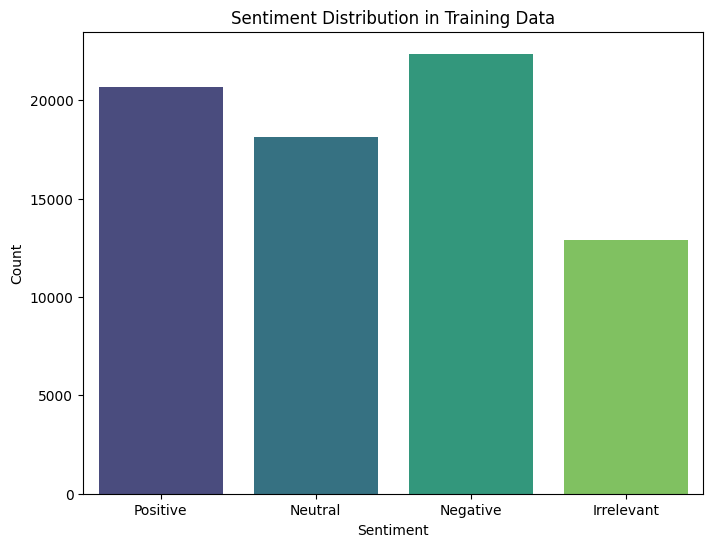

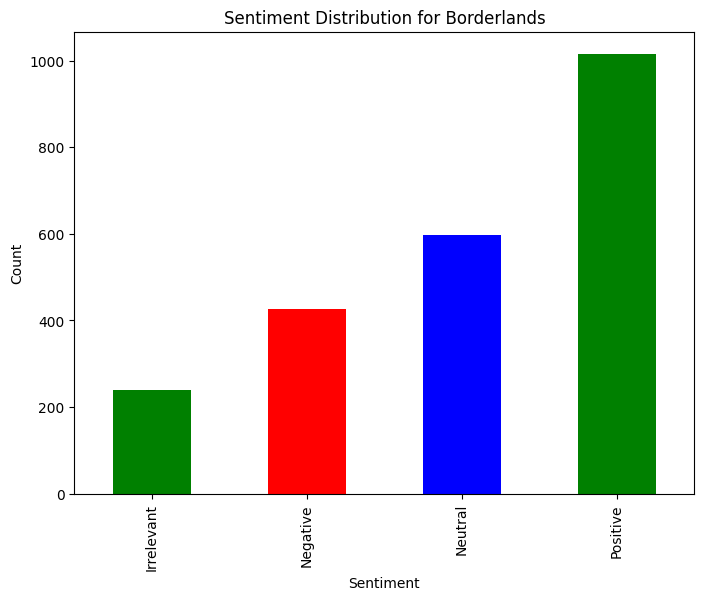

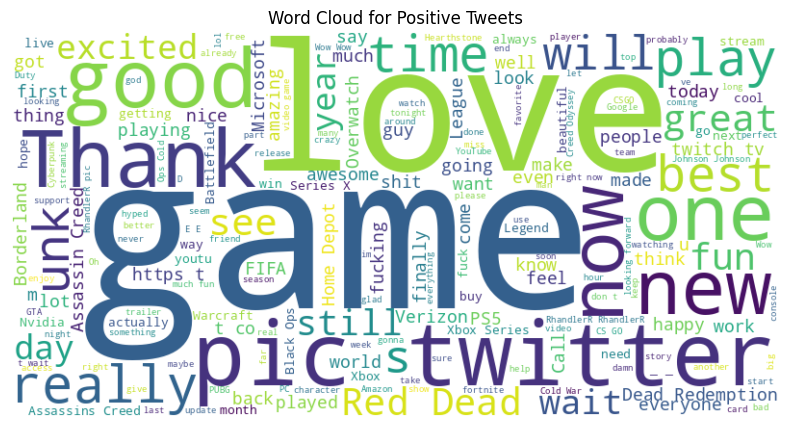


Timestamp column not found in the dataset. Skipping time series analysis.


In [4]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the training data
train_data = pd.read_csv('twitter_training.csv')

# Inspect the first few rows of the dataset
print("First few rows of the training data:")
print(train_data.head())

# Check column names to ensure they match expectations
print("\nColumn names in the dataset:")
print(train_data.columns)

# Rename columns to match expected names
train_data = train_data.rename(columns={
    '2401': 'Tweet ID',  # Replace '2401' with the actual column name for Tweet ID
    'Borderlands': 'entity',  # Replace 'Borderlands' with the actual column name for entity
    'Positive': 'sentiment',  # Replace 'Positive' with the actual column name for sentiment
    'im getting on borderlands and i will murder you all ,': 'Tweet content'  # Replace with the actual column name for tweet content
})

# Check for missing values
print("\nMissing values in the dataset:")
print(train_data.isnull().sum())

# Drop rows with missing values (if any)
train_data = train_data.dropna()

# Sentiment Distribution Analysis
print("\nSentiment distribution in the training data:")
print(train_data['sentiment'].value_counts())

# Plot sentiment distribution using a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=train_data, palette='viridis')
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Entity-Level Sentiment Analysis
# Group by entity and sentiment to analyze sentiment for specific entities
entity_sentiment = train_data.groupby(['entity', 'sentiment']).size().unstack()

# Plot sentiment distribution for a specific entity (e.g., 'Borderlands')
if 'entity' in train_data.columns:
    if 'Borderlands' in entity_sentiment.index:
        entity_sentiment.loc['Borderlands'].plot(kind='bar', figsize=(8, 6), color=['green', 'red', 'blue'])
        plt.title('Sentiment Distribution for Borderlands')
        plt.xlabel('Sentiment')
        plt.ylabel('Count')
        plt.show()
    else:
        print("\nEntity 'Borderlands' not found in the dataset.")
else:
    print("\nEntity column not found in the dataset. Skipping entity-level sentiment analysis.")

# Word Cloud for Positive Tweets
# Filter positive tweets
if 'Tweet content' in train_data.columns:
    positive_tweets = train_data[train_data['sentiment'] == 'Positive']['Tweet content']

    # Generate and display a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_tweets))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Positive Tweets')
    plt.show()
else:
    print("\n'Tweet content' column not found in the dataset. Skipping word cloud generation.")

# Time Series Analysis (if timestamp data is available)
# Example: Convert a timestamp column to datetime (if it exists)
if 'timestamp' in train_data.columns:
    train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])
    # Resample by day and plot sentiment over time
    train_data.set_index('timestamp').resample('D')['sentiment'].value_counts().unstack().plot(figsize=(10, 6))
    plt.title('Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.show()
else:
    print("\nTimestamp column not found in the dataset. Skipping time series analysis.")